# Weather Image Recognition

# Imports

In [17]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image, ImageFile

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Functions

In [21]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_process_images(img_path, target_size=(250, 250)):
  try:
    with Image.open(img_path) as img:
      img = img.resize(target_size)
      img = img.convert("RGB")
      
      img_array = np.array(img)/ 255.0
      img_array = img_array.astype(np.float32)
    return img_array
  except IOError as e:
    print(f"Error loading image {img_path}: {e}")
    return None

def grab_images(directory):
  
  images, labels = [], []

  for root, dir, files in os.walk(directory):
    for file in files:
      if file.lower().endswith((".png", ".jpeg", "jpg")):
        file_path = os.path.join(root, file)
        img = load_process_images(file_path)
        if img is not None:
          images.append(img)
          label = root.split(os.sep)[-1]
          labels.append(label)
  
  images, labels = np.array(images), np.array(labels)
  return images, labels

def check_image_class_balance(target):
  unique, counts = np.unique(target, return_counts=True)
  plt.figure(figsize=(10,6))
  plt.pie(counts, labels=unique, autopct="%1.1f%%", startangle=140)
  plt.title("Target Class Breakdown")
  plt.show()
  
  plt.figure(figsize=(10,6))
  sns.countplot(x=target)
  plt.xlabel("Target Classes")
  plt.ylabel("Counts")
  plt.title("Count plot of target classes")
  plt.xticks(rotation=45)
  plt.show()

# Load Dataset

In [3]:
PATH = "/Users/maukanmir/Downloads/dataset/"

In [13]:
X, y = grab_images(PATH)

In [18]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [20]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 4116
Validation set size: 1373
Test set size: 1373


# Check Class Imabalance

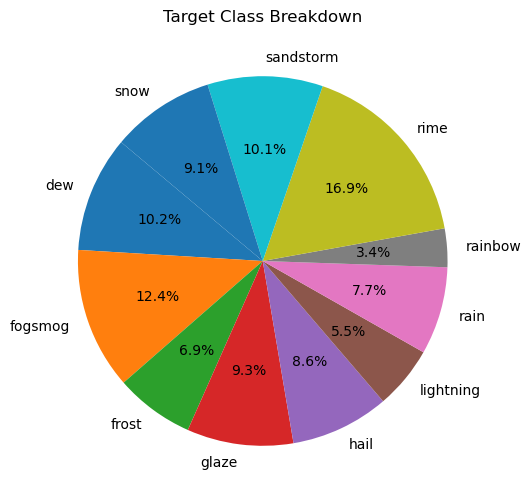

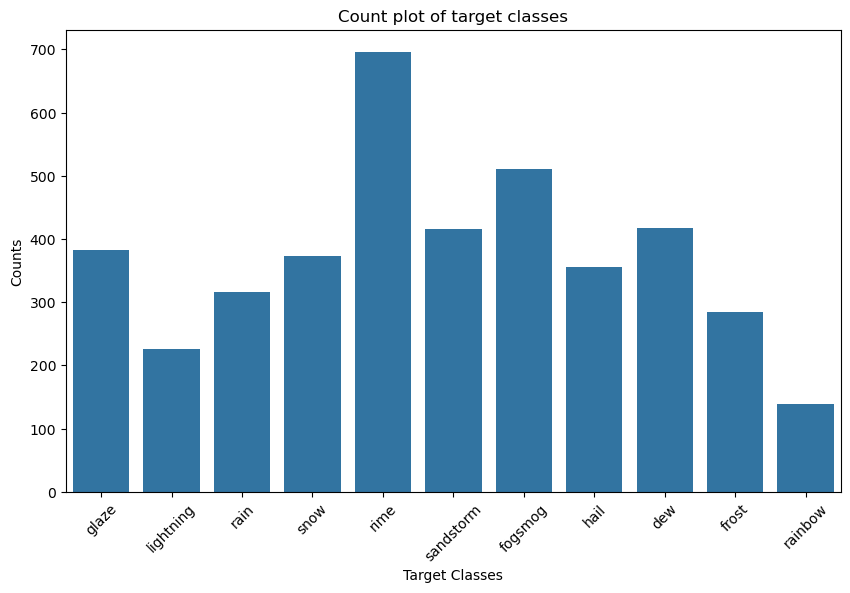

In [22]:
check_image_class_balance(y_train)